# Intermediate Project - SUSA Career Exploration

For this project, you will be using the tools that you have learned so far on a real data science problem. You will be cleaning and analyzing a dataset to answer a research question, something that you will be doing for your entire career if you continue down this path.

This project will be done **with a partner**. Modern research is collaborative, so get used to it! If you are having trouble finding a partner, please contact your committee director or post on the Career-Exploration Slack channel.

The final product for this project will be a statistical model that answers a question posed about the data, in addition to a short description about how your model works and its limitations.

## 1. Picking a Dataset

You may pick from the following datasets:

### US Census Bureau - 2015 American Community Survey

<img src=censusbureau.png width="500">

https://www.kaggle.com/muonneutrino/us-census-demographic-data

This dataset gives demographic information about the US, indexed by census tract. 

You may enjoy this dataset if you:
* are interested in social science
* follow politics
* are a "spatial" thinker

### BoardGameGeek - Board Game Dataset

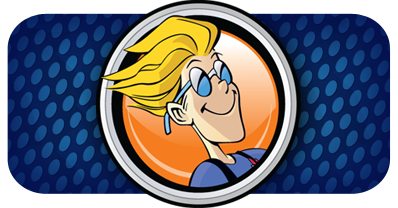

https://www.kaggle.com/mrpantherson/board-game-data

This dataset gives information on the top 5000 board games, as rated by BoardGameGeek, the gold standard rating site for tabletop gaming enthusiasts.

You may enjoy this dataset if you:
* play board games
* like reviewing things (e.g. Yelp)

The meaning of the columns:
* rank - The overall ranking of the game
* bgg_url - The link to the game's page on the BoardGameGeek website
* game_id - A unique identifier number for the game
* names - The name of the game
* min_players - The minimum number of players required to play the game
* max_players - The maximum number of players that can play the game
* avg_time - The average time the game takes to play
* min_time - The minimum time the game takes to play
* max_time - The maximum time the game takes to play
* year - The year the game was released
* avg_rating - The average rating of the game among all site users
* geek_rating - The average rating of the game among "elite" users
* num_votes - The number of times the game has been rated
* image_url - URL of an image of the game
* age - Minimum recommended age for the game
* mechanic - List of mechanics the game has
* owned - How many people on BoardGameGeek say they have the game
* category - List of genres the game is in
* designer - Who designed the game
* weight - How complex the game is, on a scale of 1-5

### Cortez et al. - Wine Dataset (Vinho Verde)

<img src=vinho-verde.jpg width="500">

https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

A dataset recording sensory and chemical attributes of wines, along with ratings given to each of them.

You may enjoy this dataset if you:

* are suspicious of the legitimacy of wine ratings
* are interested in chemistry
* day-drink

Load one of these datasets into Jupyter below:


In [1]:
#Your Code Here
import matplotlib.pyplot as plt
import random
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

census = pd.read_csv("acs2015_census_tract_data.csv")
census = census.dropna(axis = 0, how ='any') 
census.head()

,CensusTract,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,Alabama,Autauga,1948,940,1008,0.9,87.4,7.7,0.3,...,0.5,2.3,2.1,25.0,943,77.1,18.3,4.6,0.0,5.4
1,1001020200,Alabama,Autauga,2156,1059,1097,0.8,40.4,53.3,0.0,...,0.0,0.7,0.0,23.4,753,77.0,16.9,6.1,0.0,13.3
2,1001020300,Alabama,Autauga,2968,1364,1604,0.0,74.5,18.6,0.5,...,0.0,0.0,2.5,19.6,1373,64.1,23.6,12.3,0.0,6.2
3,1001020400,Alabama,Autauga,4423,2172,2251,10.5,82.8,3.7,1.6,...,0.0,2.6,1.6,25.3,1782,75.7,21.2,3.1,0.0,10.8
4,1001020500,Alabama,Autauga,10763,4922,5841,0.7,68.5,24.8,0.0,...,0.0,0.6,0.9,24.8,5037,67.1,27.6,5.3,0.0,4.2


## 2. Formulating the Question

Each dataset induces one (or more) natural questions. You should have a question before you prepare the dataset and perform your analysis.

### Census Data

This dataset should be used for regression, as it is not categorical.

Natural questions may include how a certain attribute of a state/county is affected by other features in the dataset. 


### Board Game Data

This dataset can be used for classification or regression. 

#### Regression

There are many possible variables that can be predicted in this dataset. For example, rating (geek or overall), time, owned can all be variables of interest. 

Pick one of these variables, and formulate the question that you're answering with a regression model, e.g. How do a game's other attributes affect how long the game takes?

#### Classification

During data cleaning, you created categorical variables of the game's mechanics and genres. This induces a classification problem where you can try to predict if a game is a part of a certain genre or has a particular mechanic based on all its other attributes.

### Wine Data

This dataset should be used for regression, as it is not categorical (the wines are not split into good/bad).

The natural question is how the chemical and sensory factors affect the subjective rating of wines, but you can predict almost any variable you want in terms of the other ones. 


## Project Objective

We will write a k-nearest neighbor classifier that uses all the features to try and categorize what region an unknown county is in (Northeast, Midwest, West, South) given nothing but quantitative features (unemployment rate, ethnic distributions, etc.). 

## 3. Cleaning the Dataset

After you have chosen your dataset and question, you may need to modify it for your purposes.

### Census Data

Census tracts by themselves have no meaning, and are an artefact of the data-collection process. Therefore, it would make more sense to stratify your data by state or county.

### Board Game Data

If you only look at the numerical variables in the dataset, you leave information on the table. Consider using an encoding scheme to represent the genres and mechanics of a game, and appending the dataset accordingly.

### Wine Data

This dataset is pretty clean, but has no identifier other than index. Consider adding one (optional).

Based on your question, you should modify your data to streamline the analysis process.


For all the datasets, consider if all features are relevant for your linear model. Can you remove any features off the bat because research would imply that these features are irrelevant to your predictions?

### 3a. Preparing the Dataset

In order for regression to perform well, the column variables of the data should not be skewed. If a variable is skewed (i.e. if the histogram of the variable is skewed), then transform the column with either the log or square root function.

Note that this changes the interpretation of the model coefficient corresponding to the column variable.

In addition to this, split the data into train (80%) and test (20%) sets. You will be fitting your model on the training data, while validating the model on the testing data.

In [2]:
north_index = 0 
midwest_index = 1
south_index = 2
west_index = 3
train_index = 0
test_index = 1

relevant_features = np.asarray(census.columns)[3:]
northeast_labels = ["Connecticut", "Maine", "Massachusetts", "New Hampshire", "Rhode Island", "Vermont", "New Jersey", "New York", "Pennsylvania"]
midwest_labels = ["Illinois", "Indiana", "Michigan", "Ohio", "Wisconsin", "Iowa", "Kansas", "Minnesota", "Missouri", "Nebraska", "North Dakota", "South Dakota"]
south_labels = ["Delaware", "Florida", "Georgia", "Maryland", "North Carolina", "South Carolina", "Virginia", "District of Columbia", "West Virginia", "Alabama", "Kentucky", "Mississippi", "Tennessee"]
west_labels = ["Arizona", "Colorado", "Idaho", "Montana", "Nevada", "New Mexico", "Utah", "Wyoming", "Alaska", "California", "Hawaii", "Oregon", "Washington"]
region_labels = [northeast_labels, midwest_labels, south_labels, west_labels]
region_indeces = [north_index, midwest_index, south_index, west_index] 

# input: list of state names given as strings 
# output: tuple of training, validation, and testing data 
def cleanData(region_labels):
    region_features = census.loc[census["State"].isin(region_labels)][relevant_features]
    region_train, region_test = train_test_split(region_features, test_size = .2, random_state = 0)
    return (region_train, region_test)
    
region_data = []

for label in region_labels: 
    region_data.append(cleanData(label)) 

region_data[north_index][train_index].head()

,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
45379,4442,2106,2336,52.2,1.2,42.8,0.0,1.4,0.0,1802,...,8.1,2.5,1.7,32.4,2316,78.9,9.2,11.9,0.0,5.2
41802,4694,2296,2398,16.8,67.5,6.0,0.0,9.8,0.0,3532,...,0.9,0.4,3.2,26.0,2345,82.1,9.6,8.1,0.3,10.4
67546,6259,2750,3509,3.7,88.6,1.4,0.1,4.0,0.1,5800,...,46.0,2.9,9.5,11.6,2299,66.3,30.0,3.7,0.0,13.3
31400,3527,1773,1754,24.8,53.7,15.3,0.0,0.8,0.0,2164,...,9.3,0.5,1.0,20.2,1314,95.4,2.9,1.8,0.0,12.5
47213,4132,1890,2242,10.7,73.5,3.5,0.3,11.8,0.0,2969,...,0.3,0.0,8.9,33.9,2013,76.5,18.4,5.1,0.0,5.6


## 4. Fitting Your Model

Given your proposed question, you can roughly put it into one of two different categories, classification and regression. 

* Classfication questions say, given the data, you want to classify things into categories. For example, given the board game data, max players etc., you want to know what genre the game is in. The genre of the game is a categorical value. 

* Regression problems mean, given the data, you want to regress the data on to some number. For example, given the acidity of the wine, you want to predict what is quality of the alcohol. The output now is a number on a continuous line, instead of categorical value. Given different problem settings, here are some guidelines about how to fit your model:

### Regression

<img src=1_KwdVLH5e_P9h8hEzeIPnTg.png width="500">

- You might want to format your data into a matrix, one row is one data sample, one colume is one characteristic, and format your label into vector. There are various libraries, e.g. numpy, pandas, for completing this. 
- Think about what we learned in linear regression lecture, you want to be minimizing some type of error, it might be MSE or absolute error. 
- What can you do to find the weights for each characteristic so that the error is minimized? 
- How can you expand the linear model to be nonlinear? Do you want to use machine learning? What is the loss you want to use? 
- Do you want to add some regulation to reduce the variance?

### Classfication

<img src=Screen-Shot-2017-03-11-at-10.15.37-PM.png width="500">

- First, classification is more difficult than regression given what you learned so be prepared to be challenged.
- Prepare your data, change all categorical value to numerical value, maybe using one-hot vector, or just give every characteristic a value. Remember all classes (your label) also needs to be numerical.
- Neural net, logistic regression, random forest or nearest neighbor? Pick which one you like.
- If you want to use neural net, the most widely used loss function is softmax and cross-entropy. As your last layer, you want to output k logits, given that you have k classes, and put this k logits into softmax function and use cross-entropy loss. Make sure you understand that.

#### Other tips
- Make sure you know the library available to you: numpy, pandas, scikit-learn, keras
- A lot of models are already implemented in [scikit-learn](https://scikit-learn.org/stable/documentation.html)
- Look at examples from previous lectures.

In [3]:
Y = []
Y_test = []
X = []
X_test = []

for index in region_indeces:
    for _, row in region_data[index][train_index].iterrows():
        X.append(np.array(row))

for index in region_indeces:
    for _, row in region_data[index][test_index].iterrows():
        X_test.append(np.array(row))

region_count = 0 
for index in region_indeces:
    Y += [region_count] * len(region_data[index][train_index])
    region_count += 1

region_count = 0 
for index in region_indeces:
    Y_test += [region_count] * len(region_data[index][test_index])
    region_count += 1


In [4]:
optimal_k = 5
optimal_percentage = 0

for k in np.arange(140, 500, 30):
    print("Neighbors: " + str(k)) 
    
    KNN = KNeighborsClassifier(k)
    KNN.fit(X, Y)

    KNN_predictions = []
    for test_point in X_test: 
        KNN_predictions.append(KNN.predict([test_point]))

    correct = 0
    incorrect = 0

    for i in range(len(KNN_predictions)):
        if (KNN_predictions[i] == Y_test[i]):
            correct += 1
        else:
            incorrect += 1

    print("Mean Squared Error: " + str(mean_squared_error(KNN_predictions, Y_test)))
    print("Percentage correct: " + str(correct / (correct + incorrect)))
    
    if optimal_percentage < correct / (correct + incorrect):
        optimal_percentage = correct / (correct + incorrect)
        optimal_k = k

print("Optimal number of neighbors: " + str(optimal_k) + ", Best performance: " + str(optimal_percentage))

Neighbors: 140
Mean Squared Error: 1.7230492008774678
Percentage correct: 0.4167188968975243
Neighbors: 170
Mean Squared Error: 1.7368379818238797
Percentage correct: 0.4142118458163585
Neighbors: 200
Mean Squared Error: 1.717251645252272
Percentage correct: 0.4178157317455343
Neighbors: 230
Mean Squared Error: 1.7182701347539957
Percentage correct: 0.41703227828267003
Neighbors: 260
Mean Squared Error: 1.715606392980257
Percentage correct: 0.41585709808837357
Neighbors: 290
Mean Squared Error: 1.7120808523973676
Percentage correct: 0.41562206204951424
Neighbors: 320
Mean Squared Error: 1.7348793481667188
Percentage correct: 0.41382011908492633
Neighbors: 350
Mean Squared Error: 1.7309620808523973
Percentage correct: 0.4142901911626449
Neighbors: 380
Mean Squared Error: 1.7357411469758697
Percentage correct: 0.4146035725477907
Neighbors: 410
Mean Squared Error: 1.7313538075838295
Percentage correct: 0.41562206204951424
Neighbors: 440
Mean Squared Error: 1.7387966154810404
Percentage co

In [6]:
KNN = KNeighborsClassifier(optimal_k)
KNN.fit(X, Y)

KNN_predictions = []
for test_point in X_test: 
    KNN_predictions.append(KNN.predict([test_point]))

correct = 0
incorrect = 0

for i in range(len(KNN_predictions)):
    if (KNN_predictions[i] == Y_test[i]):
        correct += 1
    else:
        incorrect += 1

print("Mean Squared Error: " + str(mean_squared_error(KNN_predictions, Y_test)))
print("Percentage correct: " + str(correct / (correct + incorrect)))

Mean Squared Error: 1.717251645252272
Percentage correct: 0.4178157317455343


## 5. Assessing Your Model

After your model is fit, you need to assess the validity of your model. 

### Regression

To assess whether your regression model is valid or not, you should look at the performance of the model on the test data.

If the performance is poor, consider changing the model by selecting different variables, transforming the data, changing the form of the regression (i.e. replacing a linear term with a quadratic term).

When you have reasonably low error on the test data, you can move on to writing your conclusions.

### Classification

To assess whether or not the classification model is valid, you should check the [confusion matrix](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/).

## Conclusion

Give a write up of your model and its performance. Be sure to include an interpretation of what the model is doing.

After testing many values of K for the k-nearest neighbor classifier, I was only able to make the accuracy 41.78% with k=200 when predicting the validation data. I believe that this is because the data is more heterogenous than I anticipated. K-nearest neighbor performs much better when the data is separated into "clouds" where all points of the same class have similar values for each feature, which is likely not the case for our census data. Another approach that I would like to try in the future is to use each feature independently to categorize the data and output a final classification by having each categorization "vote" (returns the mode of each feature classification). However, for the limited scope of this project, I believe we made an acceptable (performs almost twice as well as random guesses) albeit inconsistent classifier. 